In [11]:
# this notebook allows to save predictions as .tif files without postprocessing
%env CUDA_VISIBLE_DEVICES=1
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import skimage
import sys
from utils.utils import  load_test_predictions, load_data , load_predictions, get_shells, get_path
import matplotlib.pyplot as plt

env: CUDA_VISIBLE_DEVICES=1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Wholelife

In [5]:
target_dir = os.path.join(get_path(), "wholelife")
dataset = "wholelife"

In [6]:
exp_str_rbc = "data_valid1_valid2_valid3_by_stack_mode_3D_iso_min_train_masks_0_seed_0_fold_0_of_1_epoch_499_aniso_3.2"
exp_str_para_joint = "data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_fold_0_of_1_epoch_499_aniso_3.2"
exp_str_para_late = "data_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_fold_0_of_1_epoch_499_aniso_3.2"

In [7]:
imgs, segs, file_names = load_data(target_dir, dataset)
print(len(imgs))

pred_rbc = load_predictions(target_dir, dataset, file_names, exp_str_rbc)
pred_para_joint = load_predictions(target_dir, dataset, file_names, exp_str_para_joint)
pred_para_late = load_predictions(target_dir, dataset, file_names, exp_str_para_late)

43


In [13]:
first_late_frame = 22

for j in range(len(imgs)):
    file_name = file_names[j]
    pred_para = np.concatenate([pred_para_joint[:first_late_frame], pred_para_late[first_late_frame:]])

    shells = np.array([get_shells(frame) for frame in pred_rbc[j]])

    stack = np.stack([imgs[j], pred_rbc[j], shells, pred_para[j]])

    stack = np.moveaxis(stack, 0, 1)

    path_to_stack = os.path.join(target_dir, dataset, "results", "pred_imgs")

    if not os.path.exists(path_to_stack):
        os.mkdir(path_to_stack)

    skimage.io.imsave(os.path.join(path_to_stack, file_name+"_tp_22.tiff"), stack, imagej=True)

(-0.5, 149.5, 149.5, -0.5)

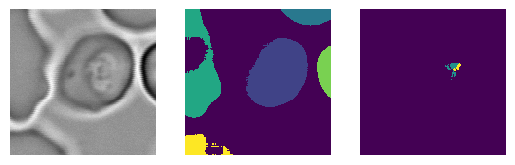

In [36]:
img_id = 2
z = 17
t = 15


fig, ax = plt.subplots(1, 3)
ax[0].imshow(imgs[img_id][t][z], cmap="gray", interpolation="none")
ax[0].axis("off")
ax[1].imshow(pred_rbc[img_id][t][z], interpolation="none")
ax[1].axis("off")
ax[2].imshow(pred_para[img_id][t][z], interpolation="none")
ax[2].axis("off")



## RBCs

In [7]:
seed = 0
n_folds = 10

In [8]:
target_dir = os.path.join(get_path(), "RBC_labelled")

In [13]:
dataset = "valid3"
eval_str_2D = "data_valid1_valid2_valid3_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499_stitch_0.1"
eval_str_3D = "data_valid1_valid2_valid3_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499_aniso_3.2"


imgs, segs, file_names = load_data(target_dir, dataset)
test_pred_2D, test_idx_2D = load_test_predictions(target_dir,
                                     dataset,
                                     file_names,
                                     eval_str_2D,
                                     seed=seed,
                                     n_folds=n_folds)


test_pred_3D, test_idx_3D = load_test_predictions(target_dir,
                                     dataset,
                                     file_names,
                                     eval_str_3D,
                                     seed=seed,
                                     n_folds=n_folds)
assert np.all(test_idx_2D == test_idx_3D)

for i, j in enumerate(test_idx_2D):
    file_name = file_names[j]
    stack = np.stack([imgs[j],
                      segs[j],
                      test_pred_2D[i],
                      test_pred_3D[i]])

    stack = np.moveaxis(stack, 0, 1)

    path_to_stack = os.path.join(target_dir, dataset, "results", "pred_imgs")

    if not os.path.exists(path_to_stack):
        os.mkdir(path_to_stack)


    skimage.io.imsave(os.path.join(path_to_stack, file_name+"_preds.tiff"), stack, imagej=True)

In [10]:
l = os.listdir(target_dir)
l.sort()
print(l)

['data_20220905', 'models', 'valid1', 'valid2', 'valid3']


(-0.5, 149.5, 149.5, -0.5)

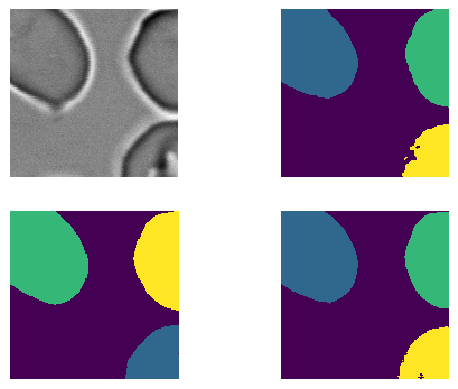

In [11]:
img_id = 13
z = 11
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(imgs[test_idx_2D[img_id]][z], cmap="gray", interpolation="none")
ax[0,0].axis("off")
ax[0,1].imshow(segs[test_idx_2D[img_id]][z], interpolation="none")
ax[0,1].axis("off")

ax[1,0].imshow(test_pred_2D[img_id][z], interpolation="none")
ax[1,0].axis("off")
ax[1,1].imshow(test_pred_3D[img_id][z], interpolation="none")
ax[1,1].axis("off")

## parasite

In [42]:
target_dir = os.path.join(get_path(), "parasite")

In [45]:
dataset = "mask-ts"
eval_str_1 = "data_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499_aniso_3.2"
eval_str_2 = "data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499_aniso_3.2"


imgs, segs, file_names = load_data(target_dir, dataset)
test_pred_1, test_idx_1 = load_test_predictions(target_dir,
                                     dataset,
                                     file_names,
                                     eval_str_1,
                                     seed=0,
                                     n_folds=10)


test_pred_2, test_idx_2 = load_test_predictions(target_dir,
                                     dataset,
                                     file_names,
                                     eval_str_2,
                                     seed=0,
                                     n_folds=10)
assert np.all( test_idx_1 == test_idx_2)

for i, j in enumerate(test_idx_1):
    file_name = file_names[j]
    stack = np.stack([imgs[j],
                      segs[j],
                      test_pred_1[i],
                      test_pred_2[i]])

    stack = np.moveaxis(stack, 0, 1)

    path_to_stack = os.path.join(target_dir, dataset, "results", "pred_imgs")

    if not os.path.exists(path_to_stack):
        os.mkdir(path_to_stack)


    skimage.io.imsave(os.path.join(path_to_stack, file_name+"_single_joint_preds.tiff"), stack, imagej=True)